# Análisis videos laboratorio óptica: Cristales líquidos

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Videos primera sesión

En esta primera parte se hace el análisis para el primer para de videos obtenidos haciendo el cambio de temperatura, luego se hace esto mismo pero para el conjunto de los videos bien grabados

In [27]:
path = '/Users/javier/Documents/university/6th-semester/'+\
       'experimental-physic2/optic-lab/video-analysis/videos/'

cap = cv2.VideoCapture(path+'image_5.avi')  # selección del video
cap2 = cv2.VideoCapture(path+'image_7.avi')
capDown7 = cv2.VideoCapture(path+'DDLCCMMR_7-001.avi')
capUp6 = cv2.VideoCapture(path+'DDLCCMMR_6-002.avi')

fps = cap.get(cv2.CAP_PROP_FPS)  # frames per second
fps2 = cap2.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # cantidad de frames
frame_count2 = int(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

# Print de la información
print('Info. image_5:')
print('-fps = ' + str(fps))
print('-number of frames = ' + str(frame_count))
print('-duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('-duration (M:S) = ' + str(minutes) + ':' + str(seconds))

Info. image_5:
-fps = 11.474
-number of frames = 1951
-duration (S) = 170.03660449712393
-duration (M:S) = 2:50.03660449712393


## Extracción de los datos de los videos

### Video bajada

In [28]:
i2 = 0
mean_array2 = np.zeros((3, frame_count2))

while(cap2.isOpened()):
  ret2, frame2 = cap2.read()

  # frame es un numpy array de (1000,1000,3)
  mean_array2[0, i2] = np.mean(frame2[:, :, 0])
  mean_array2[1, i2] = np.mean(frame2[:, :, 1])
  mean_array2[2, i2] = np.mean(frame2[:, :, 2])

  i2+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break

cap2.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

### Video subida

In [29]:
mean_array = np.zeros((3, frame_count))

i = 0

while(cap.isOpened()):
  ret, frame = cap.read()

  # frame es un numpy array de (1000,1000,3)
  mean_array[0, i] = np.mean(frame[:, :, 0])
  mean_array[1, i] = np.mean(frame[:, :, 1])
  mean_array[2, i] = np.mean(frame[:, :, 2])
  
  i+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break


cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

In [6]:
# Arreglos de los frames
frame_array = np.arange(0, frame_count, 1)
frame_array2 = np.arange(0, frame_count2, 1)

def time(frame, frame_zero):
       """
       Pasa los frames a segundos tomando t=0 cuando se deja pasar
       la luz completamente a la cámara
       """
       return 1/fps*(frame-frame_zero)


def temperature(frame, frame_zero, temp_0, rate):
       """
       Pasa lso frames a temperatura según un valor inicial
       y el ratio de cambio
       """
       t = time(frame, frame_zero)
       return rate*t/60 + temp_0

## Plot subida de temperatura

<ipython-input-7-05fbd1c41f6c>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


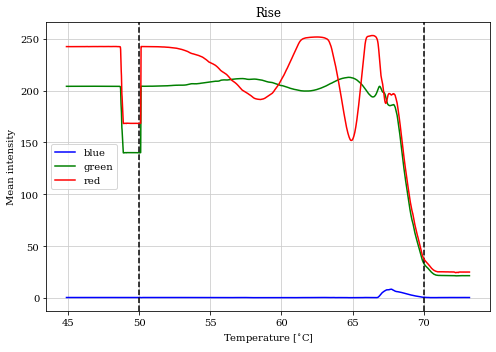

In [7]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 10, "font.family": "serif"})

temp_vid5_f = 70
temp_vid5_0 = 50
rate_vid5 = 10

frame_zero = np.where(mean_array[2,:]==np.min(mean_array[2, 350:500]))[0][0]
time_array1 = time(frame_array, frame_zero)  # in second
temperature_array1 = temperature(frame_array, frame_zero, temp_vid5_0, rate_vid5)  # in celsius

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(temperature_array1, mean_array[0], color='blue', label='blue')
ax.plot(temperature_array1, mean_array[1], color='green', label='green')
ax.axvline(x=temperature_array1[np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]],
           linestyle='--', color='black')
ax.axvline(x=temp_vid5_f,
           linestyle='--', color='black')
ax.plot(temperature_array1, mean_array[2], color='red', label='red')
ax.legend()
ax.set_xlabel('Temperature [$^{\circ}$C]')
ax.set_ylabel('Mean intensity')
ax.set_title('Rise')
fig.tight_layout()
fig.savefig('img/plots/rise_image-5.pdf')
fig.show()

## Plot bajada de temperatura

<ipython-input-13-6ff6f7f6c054>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


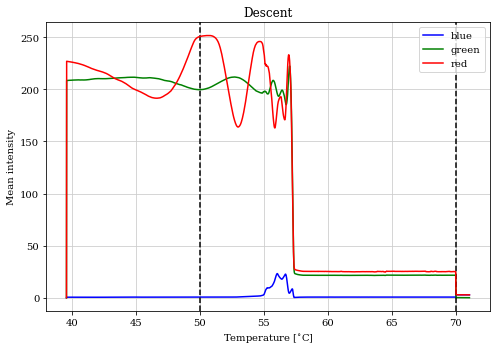

In [13]:
temp_vid7_f = 50
temp_vid7_0 = 70
rate_vid7 = -10

frame_zero2 = np.argmax(np.diff(mean_array2[2,0:100]))
time_array2 = time(frame_array2, frame_zero2)
temperature_array2 = temperature(frame_array2, frame_zero2, temp_vid7_0, rate_vid7)

fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.plot(temperature_array2, mean_array2[0], color='blue', label='blue')
ax2.plot(temperature_array2, mean_array2[1], color='green', label='green')
ax2.axvline(x=temperature_array2[frame_zero2],
           linestyle='--', color='black')
ax2.axvline(x=temp_vid7_f,
           linestyle='--', color='black')
ax2.plot(temperature_array2, mean_array2[2], color='red', label='red')
ax2.legend()
ax2.set_xlabel('Temperature [$^{\circ}$C]')
ax2.set_ylabel('Mean intensity')
#ax2.invert_xaxis()
ax2.set_title('Descent')
fig2.tight_layout()
fig2.savefig('img/plots/descent_image-7.pdf')
fig2.show()

### Sum colors and comparasion


<ipython-input-112-43109a2d17f8>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()
<ipython-input-112-43109a2d17f8>:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig7.show()


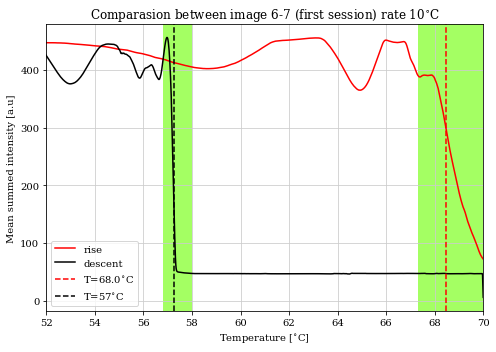

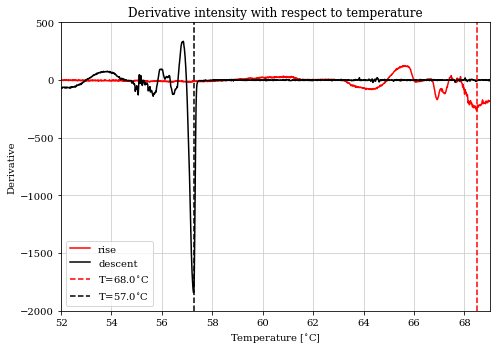

In [112]:
# Sumamos las intensidade de los 3 colores
sum_rise = np.sum(mean_array, axis=0)
sum_descent = np.sum(mean_array2, axis=0)

# Calculamos las derivadas dI/dT
dIdT_rise = np.diff(sum_rise)/np.diff(temperature_array1)
dIdT_descent = np.diff(sum_descent)/np.diff(temperature_array2)

# Valores promedio del arreglo de temperaturas
temperature_derivative1 = np.sum([temperature_array1[:-1], temperature_array1[1:]], axis=0)/2
temperature_derivative2 = np.sum([temperature_array2[:-1], temperature_array2[1:]], axis=0)/2

# Índice de los valores mínimos de la derivada (donde ocurre el cambio de fase)
min_derivative1 = np.where(dIdT_rise == np.min(dIdT_rise[1500:1750]))
min_derivative2 = np.argmin(dIdT_descent[:])

####################  Intensidad vs Temperatura  ####################
fig6, ax6 = plt.subplots(figsize=(7, 5))
ax6.plot(temperature_array1, sum_rise, color='red', label='rise')
ax6.plot(temperature_array2, sum_descent, color='black', label='descent')
ax6.axvline(x=temperature_array1[min_derivative1],
       linestyle='--', color='red', label='T='+str(round(temperature_derivative1[min_derivative1][0], 0))+'$^{\circ}$C')
ax6.axvline(x=temperature_array2[min_derivative2],
       linestyle='--', color='black', label='T='+str(round(temperature_derivative2[min_derivative2]))+'$^{\circ}$C')
ax6.set_xlim([52, 70])
ax6.legend()
ax6.set_xlabel('Temperature [$^{\circ}$C]')
ax6.set_ylabel('Mean summed intensity [a.u]')
ax6.axvspan(56.8, 58, facecolor='#a4ff63')
ax6.axvspan(67.3, 70, facecolor='#a4ff63')
ax6.set_title('Comparasion between image 6-7 (first session) rate 10$^{\circ}$C')
fig6.tight_layout()
fig6.savefig('img/plots/comparasion_image6-7.png', dpi=800)
fig6.show()

####################  Derivada vs Temperatura  ####################

fig7, ax7 = plt.subplots(figsize=(7, 5))
ax7.plot(temperature_derivative1, dIdT_rise, color='red', label='rise')
ax7.plot(temperature_derivative2, dIdT_descent, color='black', label='descent')
ax7.axvline(x=temperature_derivative1[min_derivative1],
       linestyle='--', color='red', label='T='+str(round(temperature_derivative1[min_derivative1][0],0))+'$^{\circ}$C')
ax7.axvline(x=temperature_derivative2[min_derivative2],
       linestyle='--', color='black', label='T='+str(round(temperature_derivative2[min_derivative2], 0))+'$^{\circ}$C')
ax7.set_xlim([52, 69])
ax7.set_ylim([-2000, 500])
ax7.legend()
ax7.set_xlabel('Temperature [$^{\circ}$C]')
ax7.set_ylabel('Derivative')
ax7.set_title('Derivative intensity with respect to temperature')
fig7.tight_layout()
fig7.savefig('img/plots/derivative_image6-7.png', dpi=800)
fig7.show()

# Videos segunda sesión

Análisis de los videos de la sesión del día viernes 22 de octubre

In [139]:
capDown7 = cv2.VideoCapture(path+'DDLCCMMR_7-001.avi')
capUp6 = cv2.VideoCapture(path+'DDLCCMMR_6-002.avi')

capDown5 = cv2.VideoCapture(path+'DDLCCMMR_5.avi')
capUp4 = cv2.VideoCapture(path+'DDLCCMMR_4.avi')

capDown3 = cv2.VideoCapture(path+'DDLCCMMR_3.avi')
capUp2 = cv2.VideoCapture(path+'DDLCCMMR_2.avi')

capDown1 = cv2.VideoCapture(path+'DDLCCMMR_1.avi')
capUp0 = cv2.VideoCapture(path+'DDLCCMMR_0.avi')

fps = 15.001  # definido por la cámara, igual para todos los videos

# Arreglo con la cantidad de frames por video
fps_count_array = np.array([[int(capDown7.get(cv2.CAP_PROP_FRAME_COUNT)), int(capUp6.get(cv2.CAP_PROP_FRAME_COUNT))],
                           [int(capDown5.get(cv2.CAP_PROP_FRAME_COUNT)), int(capUp4.get(cv2.CAP_PROP_FRAME_COUNT))],
                           [int(capDown3.get(cv2.CAP_PROP_FRAME_COUNT)), int(capUp2.get(cv2.CAP_PROP_FRAME_COUNT))],
                           [int(capDown1.get(cv2.CAP_PROP_FRAME_COUNT)), int(capUp0.get(cv2.CAP_PROP_FRAME_COUNT))]])

# Arreglo para ir guardando los promedios
mean_array_S2 = np.zeros((8, np.max(fps_count_array)))


Extraemos el promedio de la suma de las intensidades de los 3 colores, para cada frame (es normal que todas las celdas tengan error, ya que la cámara dio valores NonType, pero antes de esos valores se guarda todo bien y son los datos que nos interesan).

In [151]:
iDown7 = 0
while(capDown7.isOpened()):
  retDown7, frameDown7 = capDown7.read()
  mean_array_S2[7, iDown7] = np.mean(np.sum(frameDown7, axis=2))
  iDown7+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capDown7.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [149]:
iUp6 = 0
while(capUp6.isOpened()):
  retUp6, frameUp6 = capUp6.read()
  mean_array_S2[6, iUp6] = np.mean(np.sum(frameUp6, axis=2))
  iUp6+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capUp6.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [147]:
iDown5 = 0
while(capDown5.isOpened()):
  retDown5, frameDown5 = capDown5.read()
  mean_array_S2[5, iDown5] = np.mean(np.sum(frameDown5, axis=2))
  iDown5+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capDown5.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [148]:
iUp4 = 0
while(capUp4.isOpened()):
  retUp4, frameUp4 = capUp4.read()
  mean_array_S2[4, iUp4] = np.mean(np.sum(frameUp4, axis=2))
  iUp4+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capUp4.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [146]:
iDown3 = 0
while(capDown3.isOpened()):
  retDown3, frameDown3 = capDown3.read()
  mean_array_S2[3, iDown3] = np.mean(np.sum(frameDown3, axis=2))
  iDown3+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capDown3.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [144]:
iUp2 = 0
while(capUp2.isOpened()):
  retUp2, frameUp2 = capUp2.read()
  mean_array_S2[2, iUp2] = np.mean(np.sum(frameUp2, axis=2))
  iUp2+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capUp2.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [143]:
iDown1 = 0
while(capDown1.isOpened()):
  retDown1, frameDown1 = capDown1.read()
  mean_array_S2[1, iDown1] = np.mean(np.sum(frameDown1, axis=2))
  iDown1+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capDown1.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

In [140]:
iUp0 = 0
while(capUp0.isOpened()):
  retUp0, frameUp0 = capUp0.read()
  mean_array_S2[0, iUp0] = np.mean(np.sum(frameUp0, axis=2))
  iUp0+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
capUp0.release()
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 0

Con esta celda guardamos el arreglo mean_array_S2 (tarda como 2 hrs en hacerse), y lo podemos volver a cargar

In [153]:
#np.save('data_session2.npy', mean_array_S2)
mean_array_S2 = np.load('data_session2.npy')

<ipython-input-164-310bcbde8eb0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fps_array_S2 = np.flipud(np.array([np.arange(0, fps_count_array[0][0], 1),


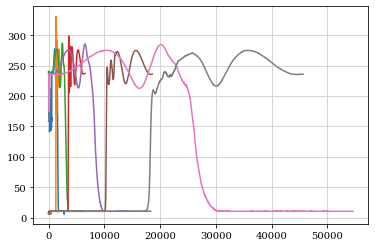

In [164]:
fps_array_S2 = np.flipud(np.array([np.arange(0, fps_count_array[0][0], 1),
                         np.arange(0, fps_count_array[0][1], 1),
                         np.arange(0, fps_count_array[1][0], 1),
                         np.arange(0, fps_count_array[1][1], 1),
                         np.arange(0, fps_count_array[2][0], 1),
                         np.arange(0, fps_count_array[2][1], 1),
                         np.arange(0, fps_count_array[3][0], 1),
                         np.arange(0, fps_count_array[3][1], 1)]))

for j in range(0, 8, 1):
    plt.plot(fps_array_S2[j], mean_array_S2[j][:len(fps_array_S2[j])])

# Lásers

In [17]:
blue_power = np.arange(5, 105, 10)
mean_intensity = np.array([13.45, 17.47, 21.20, 25.15, 27.50,
                            29.45, 29.44, 27.97, 24.77, 19.78, 
                            21.94, 24.95, 27.77, 29.77, 30.47,
                            28.46, 25.70, 19.31, 13.54])

std_intensity = np.array([0])

<ipython-input-19-372809a62e65>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


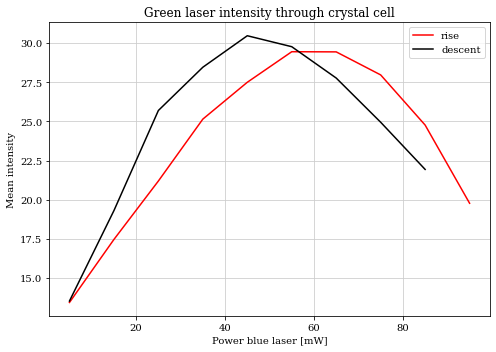

In [19]:
fig5, ax5 = plt.subplots(figsize=(7, 5))
ax5.plot(blue_power, mean_intensity[:10], color='red', label='rise')
ax5.plot(blue_power[:-1], np.flipud(mean_intensity[10:]), color='black', label='descent')
#ax5.plot(temperature_arrayDown7, mean_arrayDown7[1], color='green', label='green')
#ax5.plot(temperature_arrayDown7, mean_arrayDown7[2], color='red', label='red')
#ax5.invert_xaxis()
ax5.legend()
ax5.set_xlabel('Power blue laser [mW]')
ax5.set_title('Green laser intensity through crystal cell')
ax5.set_ylabel('Mean intensity')
fig5.tight_layout()
#fig5.savefig('img/plots/descentDDLCCMMR_7-001.pdf')
fig5.show()